### Importando algumas lib necessárias

In [1]:

import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
path='Safra_2018-2019.csv'
type(path)

str

In [3]:
df1 = pd.read_csv('Safra_2018-2019.csv')
df1.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


# Removendo algumas colunas

In [4]:
df1= df1.drop(columns=['Identificador_Agricultor','Unnamed: 0'])

In [5]:
df1.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


# Dummy para variáveis categoricas (categoria_pesticida)

In [6]:
df1 = pd.get_dummies(df1,columns = ['Categoria_Pesticida'], drop_first = False, )
df1

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3
0,188,1,0,0,0.0,0,1,0,1,0,0
1,209,1,0,0,0.0,0,2,1,1,0,0
2,257,1,0,0,0.0,0,2,1,1,0,0
3,257,1,1,0,0.0,0,2,1,1,0,0
4,342,1,0,0,0.0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79995,209,0,1,20,12.0,6,2,0,0,1,0
79996,232,0,1,20,12.0,9,1,0,0,1,0
79997,256,0,1,10,14.0,10,1,0,0,1,0
79998,256,0,1,10,16.0,8,2,0,0,1,0


## Observando a estrutura dos dados

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estimativa_de_Insetos  80000 non-null  int64  
 1   Tipo_de_Cultivo        80000 non-null  int64  
 2   Tipo_de_Solo           80000 non-null  int64  
 3   Doses_Semana           80000 non-null  int64  
 4   Semanas_Utilizando     71945 non-null  float64
 5   Semanas_Sem_Uso        80000 non-null  int64  
 6   Temporada              80000 non-null  int64  
 7   dano_na_plantacao      80000 non-null  int64  
 8   Categoria_Pesticida_1  80000 non-null  uint8  
 9   Categoria_Pesticida_2  80000 non-null  uint8  
 10  Categoria_Pesticida_3  80000 non-null  uint8  
dtypes: float64(1), int64(7), uint8(3)
memory usage: 5.1 MB


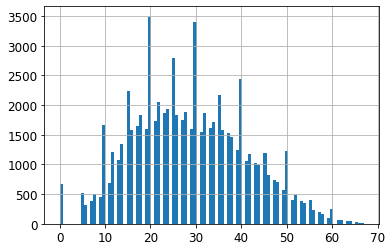

In [8]:
df1["Semanas_Utilizando"].hist(bins = 100)

Uma vez que apenas 10% da base possui a variável Semanas_Utilizando missing e a distribuição da mesma é grosseiramente simétrica em torno da média, vamos experimentar substituir os valores missing pela mediana.

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df1) #Essa média será usada depois no conjunto em que iremos fazer a previsão 


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [10]:
X = imputer.transform(df1)

In [11]:
#Após usar o Imputer os dados se tornam um array numpy, para transformá-lo em um DataFrame novamente basta:
df1 = pd.DataFrame(X, columns = df1.columns, index = df1.index)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estimativa_de_Insetos  80000 non-null  float64
 1   Tipo_de_Cultivo        80000 non-null  float64
 2   Tipo_de_Solo           80000 non-null  float64
 3   Doses_Semana           80000 non-null  float64
 4   Semanas_Utilizando     80000 non-null  float64
 5   Semanas_Sem_Uso        80000 non-null  float64
 6   Temporada              80000 non-null  float64
 7   dano_na_plantacao      80000 non-null  float64
 8   Categoria_Pesticida_1  80000 non-null  float64
 9   Categoria_Pesticida_2  80000 non-null  float64
 10  Categoria_Pesticida_3  80000 non-null  float64
dtypes: float64(11)
memory usage: 6.7 MB


In [13]:
# Agora não temos mais valores missing

In [14]:
df1.describe()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1400.020875,0.283338,0.455550,25.846750,28.597575,9.549088,1.897575,0.192312,0.009538,0.713337,0.277125
std,849.792471,0.450622,0.498023,15.557246,11.784339,9.905547,0.702079,0.455912,0.097194,0.452205,0.447582
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,15.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1212.000000,0.000000,0.000000,20.000000,28.000000,7.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,1898.000000,1.000000,1.000000,40.000000,36.000000,16.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,4097.000000,1.000000,1.000000,95.000000,67.000000,50.000000,3.000000,2.000000,1.000000,1.000000,1.000000


Saving figure attribute_histogram_plots_2018-2019


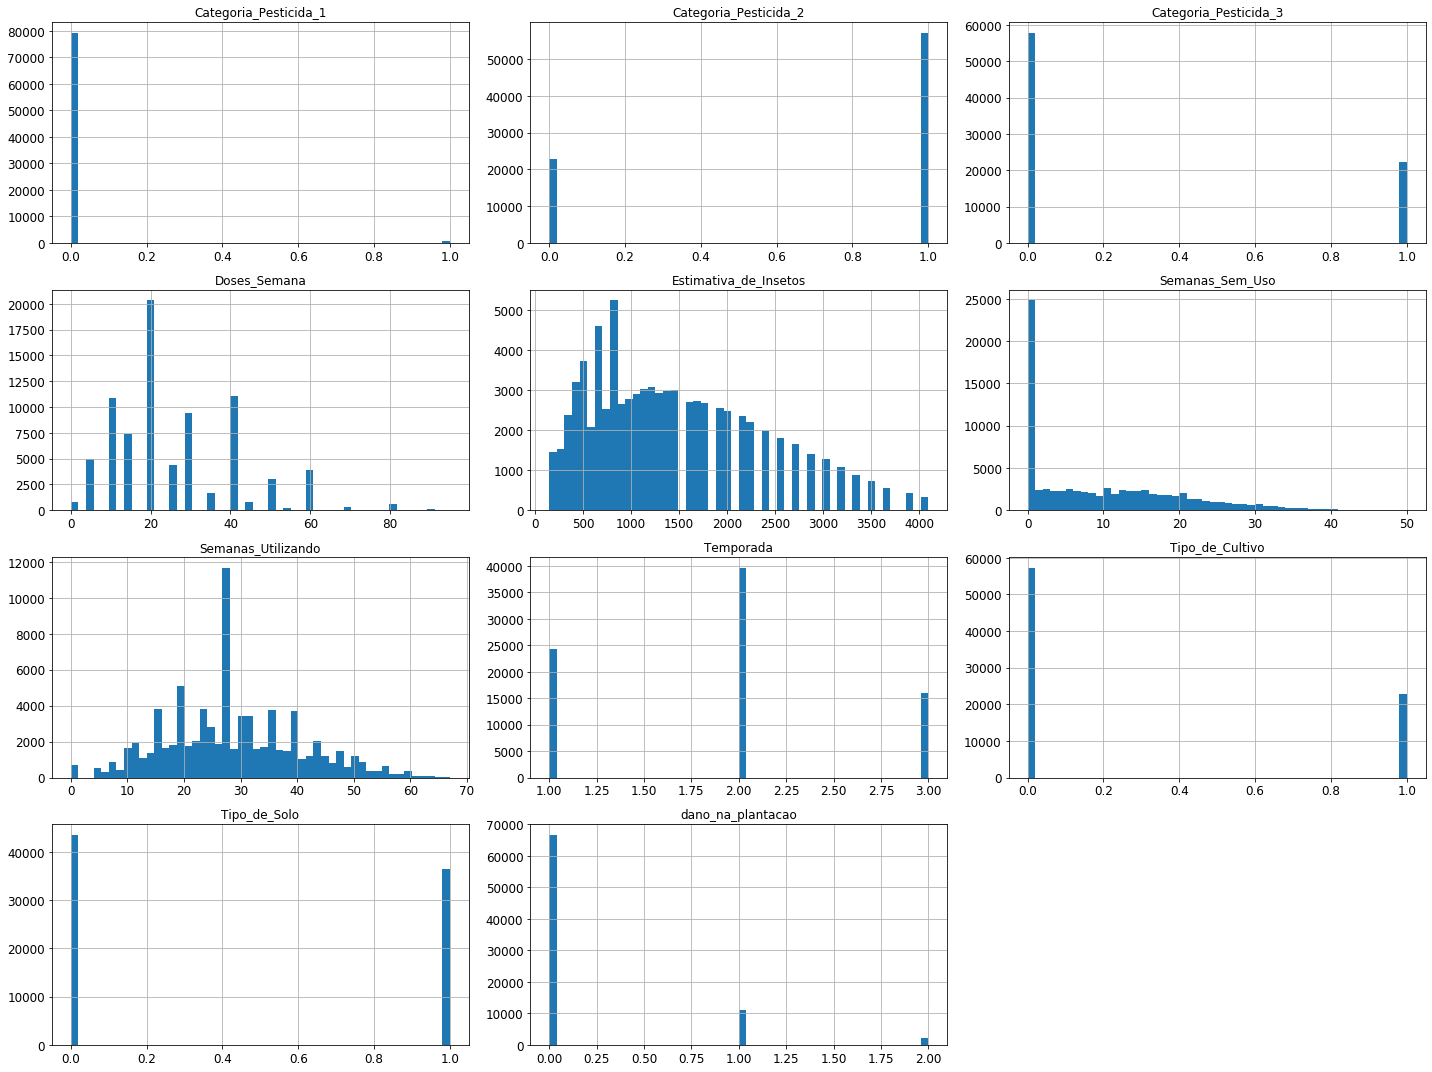

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_2018-2019")
plt.show()

## Create a Test Set

### Como os dados da variável alvo são desbalanceados vamos usar a técnica de UNDERSAMPLING

In [16]:
target = 'dano_na_plantacao'

In [17]:
minority_class_len = len(df1[df1[target] == 2])
print(minority_class_len)

2101


In [18]:
majority_class_len = len(df1[df1[target] == 0])
print(majority_class_len)

66716


In [19]:
middle_class_len = len(df1[df1[target] == 1])
print(middle_class_len)

11183


In [20]:
majority_class_indices = df1[df1[target] == 0].index
print(majority_class_indices)

Int64Index([    0,     8,    10,    21,    24,    25,    26,    27,    29,
               30,
            ...
            79990, 79991, 79992, 79993, 79994, 79995, 79996, 79997, 79998,
            79999],
           dtype='int64', length=66716)


In [21]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

2101


In [22]:
middle_class_indices = df1[df1[target] == 1].index
print(middle_class_indices)

Int64Index([    1,     2,     3,     4,     5,     6,    11,    12,    13,
               15,
            ...
            79956, 79963, 79964, 79965, 79966, 79975, 79976, 79981, 79982,
            79985],
           dtype='int64', length=11183)


In [23]:
random_middle_indices = np.random.choice(middle_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

2101


In [24]:
minority_class_indices = df1[df1[target] == 2].index
print(minority_class_indices)

Int64Index([    7,     9,    14,   103,   112,   149,   165,   166,   167,
              179,
            ...
            79291, 79335, 79512, 79614, 79708, 79785, 79786, 79864, 79865,
            79935],
           dtype='int64', length=2101)


In [25]:
under_sample_indices = np.concatenate([minority_class_indices,random_middle_indices,random_majority_indices])

In [26]:
under_sample = df1.loc[under_sample_indices]

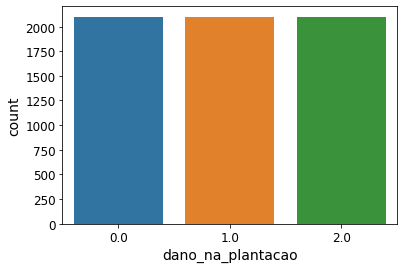

In [27]:
sns.countplot(x=target, data=under_sample)

In [28]:
X = under_sample.loc[:, df1.columns!=target]
Y = under_sample.loc[:, df1.columns==target]

In [29]:
df_X = pd.DataFrame(X)
df_X

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3
7,577.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,1132.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14,1575.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
103,625.0,0.0,1.0,30.0,29.0,0.0,1.0,0.0,0.0,1.0
112,732.0,0.0,0.0,50.0,30.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
21709,448.0,0.0,1.0,20.0,24.0,7.0,2.0,0.0,1.0,0.0
66872,531.0,0.0,0.0,15.0,32.0,1.0,2.0,0.0,1.0,0.0
32817,984.0,1.0,0.0,10.0,18.0,15.0,2.0,0.0,1.0,0.0
65955,1297.0,1.0,0.0,10.0,30.0,11.0,2.0,0.0,1.0,0.0


In [30]:
df_Y = pd.DataFrame(Y)
df_Y

,dano_na_plantacao
7,2.0
9,2.0
14,2.0
103,2.0
112,2.0
...,...
21709,0.0
66872,0.0
32817,0.0
65955,0.0


In [31]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

### Treinando o modelo de Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [35]:
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# view the feature scores

feature_scores = pd.Series(forest_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Estimativa_de_Insetos    0.306513
Semanas_Utilizando       0.251663
Doses_Semana             0.143199
Semanas_Sem_Uso          0.132576
Temporada                0.058212
Categoria_Pesticida_2    0.030558
Tipo_de_Solo             0.029548
Tipo_de_Cultivo          0.023533
Categoria_Pesticida_3    0.019637
Categoria_Pesticida_1    0.004561
dtype: float64

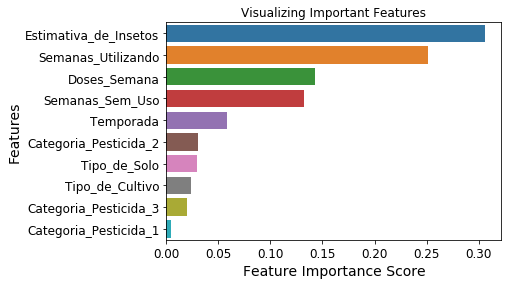

In [37]:
# seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# labels para o grafico

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Titulo para o grafico

plt.title("Visualizing Important Features")

plt.show()

In [38]:
# classifier 

rfc = RandomForestClassifier(random_state=0)



# fit

rfc.fit(X_train, Y_train.values.ravel())


# Predição para a amostra de teste

y_pred = rfc.predict(X_test)

# Check para a acurácia do modelo

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5139


Agora, vamos retirar as variáveis com menos importancia ao modelo, remodelar e checar novamente o efeito sobre a acurácia.

In [39]:
# declarando as variáveis preditoras e a variável alvo

X = df_X.drop(['Categoria_Pesticida_1', 'Categoria_Pesticida_2','Categoria_Pesticida_3','Tipo_de_Solo','Temporada','Tipo_de_Cultivo'], axis=1)

y = df_Y

In [40]:
# Separando os dados em treino e teste 50/50

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [41]:
df9 = pd.DataFrame(X_train)
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 73976 to 32989
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estimativa_de_Insetos  3151 non-null   float64
 1   Doses_Semana           3151 non-null   float64
 2   Semanas_Utilizando     3151 non-null   float64
 3   Semanas_Sem_Uso        3151 non-null   float64
dtypes: float64(4)
memory usage: 123.1 KB


In [42]:
clf = RandomForestClassifier(random_state=666, n_estimators = 600,max_depth = 10 , min_samples_split = 3)

# Ajustando o modelo aos dados de treino

clf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=666,
                       verbose=0, warm_start=False)

In [43]:
# Fazendo a predição para o conjunto de teste

y_pred = clf.predict(X_test)


In [44]:
# Check para o score da acurácia 

print('Model accuracy score with same variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with same variable removed : 0.5213


In [45]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[729 167 164]
 [324 290 425]
 [182 247 624]]


# Safra 2020


In [46]:
path='Safra_2020.csv'
df2 = pd.read_csv('Safra_2020.csv')
df2

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,NaN,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1
...,...,...,...,...,...,...,...,...,...,...
8853,88853,SCROP88854,3337,1,0,2,10,12.0,44,3
8854,88854,SCROP88855,3516,1,0,2,10,20.0,38,1
8855,88855,SCROP88856,3516,1,0,2,15,40.0,8,2
8856,88856,SCROP88857,3702,1,0,2,10,25.0,18,3


In [47]:
df2= df2.drop(columns=['Identificador_Agricultor','Unnamed: 0','Categoria_Pesticida','Tipo_de_Solo','Temporada','Tipo_de_Cultivo'])
df2.head()

,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso
0,256,35,11.0,9
1,283,5,5.0,6
2,283,15,15.0,5
3,283,15,NaN,7
4,283,15,19.0,2


In [48]:
imputer = SimpleImputer(strategy="median")
imputer.fit(df2) 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [49]:
X = imputer.transform(df2)

In [50]:
df2 = pd.DataFrame(X, columns = df2.columns, index = df2.index)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8858 entries, 0 to 8857
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estimativa_de_Insetos  8858 non-null   float64
 1   Doses_Semana           8858 non-null   float64
 2   Semanas_Utilizando     8858 non-null   float64
 3   Semanas_Sem_Uso        8858 non-null   float64
dtypes: float64(4)
memory usage: 276.9 KB


In [52]:
y_pred = clf.predict(df2)

In [53]:
df5 = pd.DataFrame(y_pred)
df5

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8853,0.0
8854,1.0
8855,1.0
8856,1.0


In [54]:
df5.columns = ['dano_na_plantacao']
df5

,dano_na_plantacao
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8853,0.0
8854,1.0
8855,1.0
8856,1.0


In [55]:
Safra_2020 = pd.concat([df2, df5], axis=1)

In [56]:
Safra_2020

,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,dano_na_plantacao
0,256.0,35.0,11.0,9.0,0.0
1,283.0,5.0,5.0,6.0,0.0
2,283.0,15.0,15.0,5.0,0.0
3,283.0,15.0,27.0,7.0,0.0
4,283.0,15.0,19.0,2.0,0.0
...,...,...,...,...,...
8853,3337.0,10.0,12.0,44.0,0.0
8854,3516.0,10.0,20.0,38.0,1.0
8855,3516.0,15.0,40.0,8.0,1.0
8856,3702.0,10.0,25.0,18.0,1.0


In [57]:
Safra_2020.to_excel("Safra_2020_resultado.xlsx") 